### 3. Results

In [1]:
# Loading and formatting of the datasets generated by the "shortcuts" experiment
# Average per subject over all measurements (as it was the case in Warren, 2017)

import numpy as np
import scipy.stats

dataset_ue = np.loadtxt("datasets/dataset_ue.txt", delimiter="\t", dtype=float)
ue_va = np.mean(dataset_ue[:, :8], axis=1)
ue_em1 = np.mean(dataset_ue[:, 8:16], axis=1)
ue_em2 = np.mean(dataset_ue[:, 16:], axis=1)

dataset_ae = np.loadtxt("datasets/dataset_ae.txt", delimiter="\t", dtype=float)
ae_va = scipy.stats.circmean(dataset_ae[:, :8], np.pi, -np.pi, axis=1)
ae_em1 = scipy.stats.circmean(dataset_ae[:, 8:16], np.pi, -np.pi, axis=1)
ae_em2 = scipy.stats.circmean(dataset_ae[:, 16:], np.pi, -np.pi, axis=1)

print("Results, overall average:")

print("Avg. unit vector distance error: va: {:.4f} | em1: {:.4f} | em2: {:.4f}".format(
    np.mean(ue_va), np.mean(ue_em1),np.mean(ue_em2)))

print("Avg. angular error: va: {:.4f}° | em1: {:.4f}° | em2: {:.4f}°".format(
    np.rad2deg(scipy.stats.circmean(ae_va, np.pi, -np.pi)),
    np.rad2deg(scipy.stats.circmean(ae_em1, np.pi, -np.pi)),
    np.rad2deg(scipy.stats.circmean(ae_em2, np.pi, -np.pi))))

print("Avg. absolute angular error: va: {:.4f}° | em1: {:.4f}° | em2: {:.4f}°".format(
    np.rad2deg(scipy.stats.circmean(np.abs(ae_va), np.pi, -np.pi)),
    np.rad2deg(scipy.stats.circmean(np.abs(ae_em1), np.pi, -np.pi)),
    np.rad2deg(scipy.stats.circmean(np.abs(ae_em2), np.pi, -np.pi))))

print("Overall angular deviation VA:{:.4f}°, em1:{:.4f}°, em2:{:.4f}°".format(
    np.rad2deg(scipy.stats.circstd(ae_va, np.pi, -np.pi)),
    np.rad2deg(scipy.stats.circstd(ae_em1, np.pi, -np.pi)),
    np.rad2deg(scipy.stats.circstd(ae_em2, np.pi, -np.pi))))


Results, overall average:
Avg. unit vector distance error: va: 0.3358 | em1: 0.3919 | em2: 0.5561
Avg. angular error: va: -12.4960° | em1: -15.2654° | em2: -26.6478°
Avg. absolute angular error: va: 13.0551° | em1: 15.2654° | em2: 26.6478°
Overall angular deviation VA:11.7551°, em1:11.9795°, em2:12.1915°


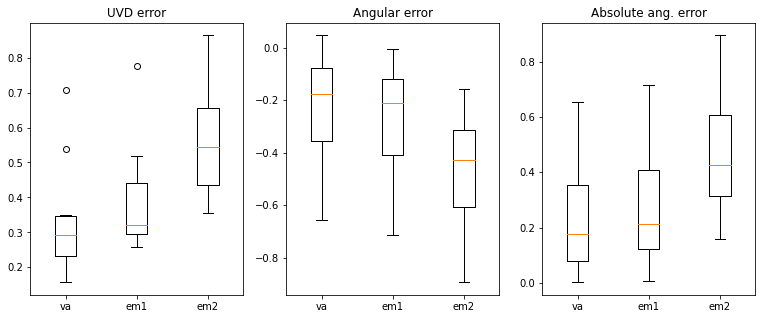

In [3]:
# [RUN TWICE for large plots!] Boxplot of the results, all measurements
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 5]

ax = plt.subplot(131)
ax.boxplot([ue_va, ue_em1, ue_em2])
ax.set_xticklabels(["va", "em1", "em2"])
ax.set_title("UVD error")

ax = plt.subplot(132)
ax.boxplot([ae_va, ae_em1, ae_em2])
ax.set_xticklabels(["va", "em1", "em2"])
ax.set_title("Angular error")

ax = plt.subplot(133)
ax.boxplot([np.abs(ae_va), np.abs(ae_em1), np.abs(ae_em2)])
ax.set_xticklabels(["va", "em1", "em2"])
ax.set_title("Absolute ang. error")
plt.show()


From these plots, the distribution of errors of the vector addition model and the errors resulting from embedding 1 seem to be quite close. Are the differences statistically significant?

<br />

#### 3.1 Unit vector distance errors

Shapiro-Wilk-test for normal distribution: va, em1, em2
ShapiroResult(statistic=0.8518129587173462, pvalue=0.06104519963264465)
ShapiroResult(statistic=0.8000063300132751, pvalue=0.014501124620437622)
ShapiroResult(statistic=0.9493804574012756, pvalue=0.6611759066581726)


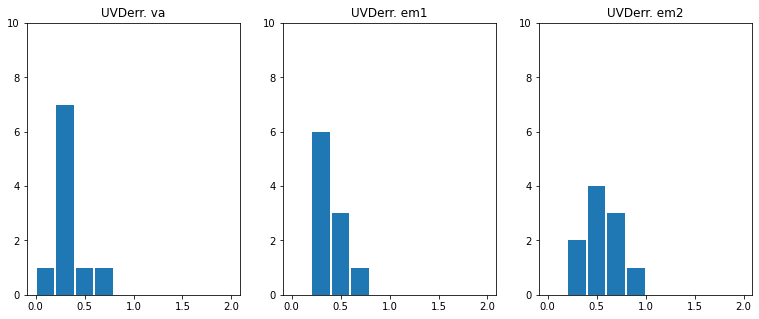

In [4]:
# Statsistics with unit vector distance (ue)

print("Shapiro-Wilk-test for normal distribution: va, em1, em2")
print(scipy.stats.shapiro(ue_va))
print(scipy.stats.shapiro(ue_em1))
print(scipy.stats.shapiro(ue_em2))

ax = plt.subplot(131)
plt.hist(ue_va,10,(0,2), rwidth=0.9)
ax.set_ylim(0, 10)
ax.set_title("UVDerr. va")

ax = plt.subplot(132)
plt.hist(ue_em1,10,(0,2), rwidth=0.9)
ax.set_ylim(0, 10)
ax.set_title("UVDerr. em1")

ax = plt.subplot(133)
plt.hist(ue_em2,10,(0,2), rwidth=0.9)
ax.set_ylim(0, 10)
ax.set_title("UVDerr. em2")


plt.show()

In [5]:
# Significance testing VA - Em1

print(scipy.stats.ttest_ind(ue_va, ue_em1, equal_var=False))
print(scipy.stats.mannwhitneyu(ue_va, ue_em1))
print(scipy.stats.kstest(ue_va, ue_em1))
print("Cohen's d: {}".format(np.abs((np.mean(ue_va) - np.mean(ue_em1))
    / np.sqrt(np.var(ue_va) + np.var(ue_em1)))))


Ttest_indResult(statistic=-0.7673953230478464, pvalue=0.4528117311655666)
MannwhitneyuResult(statistic=36.0, pvalue=0.3074894566186813)
KstestResult(statistic=0.4, pvalue=0.41752365281777043)
Cohen's d: 0.2557984410159488


There are no significant differences in the unit vector distance errors generated by the models. Note that this does not mean that they make the same predictions.

<br />

#### 3.2 Angular error

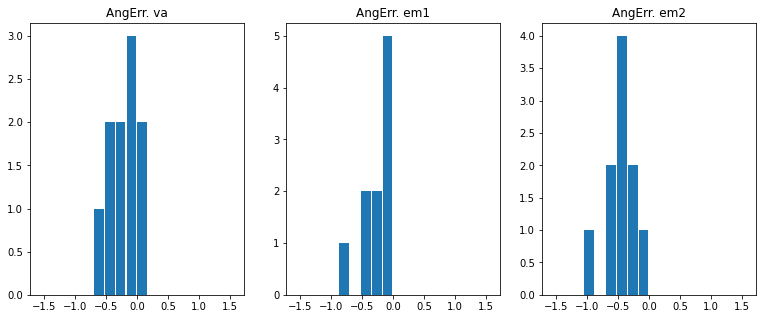

In [6]:
# Histograms of the angular data

ax = plt.subplot(131)
plt.hist(ae_va, 18, (-np.pi/2, np.pi/2), rwidth=0.9)
ax.set_title("AngErr. va")

ax = plt.subplot(132)
plt.hist(ae_em1, 18, (-np.pi/2, np.pi/2), rwidth=0.9)
ax.set_title("AngErr. em1")

ax = plt.subplot(133)
plt.hist(ae_em2, 18, (-np.pi/2, np.pi/2), rwidth=0.9)
ax.set_title("AngErr. em2")
plt.show()

In [7]:
# Significance testing VA - em1, Va - em2 with Wattson-Williams F-test for circular data
# (Same as in Warren et al., 2017)

import pycircstat
import function_repository4 as fr4

rl_p, rl_z = pycircstat.tests.rayleigh(ae_va,)
print("VA:Rayleigh-test for uniform distribution: p={}, z(10)={}".format(rl_p, rl_z))
rl_p, rl_z = pycircstat.tests.rayleigh(ae_em1,)
print("Em1:Rayleigh-test for uniform distribution: p={}, z(10)={}".format(rl_p, rl_z))
rl_p, rl_z = pycircstat.tests.rayleigh(ae_em2,)
print("Em2:Rayleigh-test for uniform distribution: p={}, z(10)={}".format(rl_p, rl_z))

ww_p, ww_f = pycircstat.tests.watson_williams(ae_va, ae_em1)
print("VA-Em1: Wattson-Williams result: p={}".format(ww_p))

ww_p, _ = pycircstat.tests.watson_williams(ae_va, ae_em2)
print("VA-Em2: Wattson-Williams result: p={}".format(ww_p))

# t-tests should also work given that the errors cluster around 0 and range from -pi to pi
print("\nShapiro-Wilk-test for normal distribution: va, em1, em2")
print(scipy.stats.shapiro(ae_va))
print(scipy.stats.shapiro(ae_em1))
print(scipy.stats.shapiro(ae_em2))

print("VA-em1: {}".format(scipy.stats.ttest_ind(ae_va, ae_em1)))
print("VA-em2: {}".format(scipy.stats.ttest_ind(ae_va, ae_em2)))
print("Cohen's d (VA-em1): {}, Circular: {}".format(fr4.cohens_d(ae_va, ae_em1), 
    fr4.cohens_d(ae_va, ae_em1, circular=True)))
print("Cohen's d (VA-em2): {}, Circular: {}".format(fr4.cohens_d(ae_va, ae_em2), 
    fr4.cohens_d(ae_va, ae_em2, circular=True)))

VA:Rayleigh-test for uniform distribution: p=1.4882078301081555e-06, z(10)=9.587808380742526
Em1:Rayleigh-test for uniform distribution: p=1.5503137081479307e-06, z(10)=9.57226707313264
Em2:Rayleigh-test for uniform distribution: p=1.6120785094687333e-06, z(10)=9.557338617782344
VA-Em1: Wattson-Williams result: p=0.6257470916437248
VA-Em2: Wattson-Williams result: p=0.021779906614212904

Shapiro-Wilk-test for normal distribution: va, em1, em2
ShapiroResult(statistic=0.9396512508392334, pvalue=0.5491392612457275)
ShapiroResult(statistic=0.927735447883606, pvalue=0.4259914457798004)
ShapiroResult(statistic=0.9562084078788757, pvalue=0.7419272661209106)
VA-em1: Ttest_indResult(statistic=0.49722140018574845, pvalue=0.625051755181419)
VA-em2: Ttest_indResult(statistic=2.5080939248612646, pvalue=0.021935664723786143)
Cohen's d (VA-em1): 0.22236417013659202, Circular: 0.22363904411223284
Cohen's d (VA-em2): 1.1216537019888075, Circular: 1.1428087413321948


In [8]:
# Output with df of the WW-Test ae_va / ae_em1
ww_f

,df,SS,MS,F,p-value
Source,,,,,
Columns,1.0,0.005716,0.005716,0.24623,0.625747
Residual,18.0,0.424468,0.023582,NaN,NaN
Total,19.0,0.430185,NaN,NaN,NaN


<br />

#### 3.3 Absolute angular error

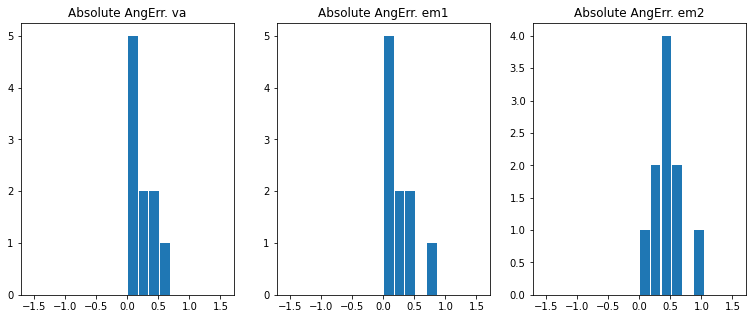

In [9]:
# For completeness: Histograms of the absolute angular error.

ax = plt.subplot(131)
plt.hist(np.abs(ae_va), 18, (-np.pi/2, np.pi/2), rwidth=0.9)
ax.set_title("Absolute AngErr. va")

ax = plt.subplot(132)
plt.hist(np.abs(ae_em1), 18, (-np.pi/2, np.pi/2), rwidth=0.9)
ax.set_title("Absolute AngErr. em1")

ax = plt.subplot(133)
plt.hist(np.abs(ae_em2), 18, (-np.pi/2, np.pi/2), rwidth=0.9)
ax.set_title("Absolute AngErr. em2")
plt.show()


In [10]:
# Significance testing of absolute angular error. The absolute error is not normally
# distributed, and we use distribution-free methods:

ww_p, _ = pycircstat.tests.watson_williams(np.abs(ae_va), np.abs(ae_em1))
print("VA-Em1: Wattson-Williams result: p={}".format(ww_p))

ww_p, _ = pycircstat.tests.watson_williams(np.abs(ae_va), np.abs(ae_em2))
print("VA-Em2: Wattson-Williams result: p={}".format(ww_p))


print(scipy.stats.mannwhitneyu(np.abs(ae_va), np.abs(ae_em1)))
print(scipy.stats.mannwhitneyu(np.abs(ae_va), np.abs(ae_em2)))
print(scipy.stats.kstest(np.abs(ae_va), np.abs(ae_em1)))
print(scipy.stats.kstest(np.abs(ae_va), np.abs(ae_em2)))


VA-Em1: Wattson-Williams result: p=0.6890748489111909
VA-Em2: Wattson-Williams result: p=0.023460261378917966
MannwhitneyuResult(statistic=42.0, pvalue=0.5707503880581739)
MannwhitneyuResult(statistic=20.0, pvalue=0.025748080821108063)
KstestResult(statistic=0.2, pvalue=0.9944575548290717)
KstestResult(statistic=0.6, pvalue=0.05244755244755244)


#### 3.4 Discussion

There are no significant differences in error prediction between at least one embedding found by the minimization algorithm and the shortest path vector addition. This does not mean that the vector addition model is wrong or that the map must be Euclidean, but it does refute the assertion by Warren et al. (2017) that the Wormhole maze cannot be explained adequately by a Euclidean map.

Note that the embedding is a result of minimization of ground truth angles and distances and it does not include any parameters based on the individual subjects. It is unlikely that all subjects would share the same distorted Euclidean map and individual fits would possibly greatly improve the model's prediction (but this is equally true for the labeled graph / vector addition model).

From the available data, overfits can be produced by treating the subjects' estimations as additional edges in the graph, but no testing dataset exists to verify the fits. The parametrization also does not include any bias parameters.

(Cont.)

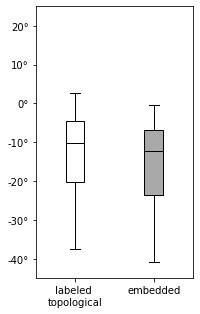

In [11]:
# Additional figures: Prediction Error
import matplotlib.ticker 

ax = plt.subplot(141)
bplot = ax.boxplot([np.rad2deg(ae_va), np.rad2deg(ae_em1)],
                   widths=0.24, patch_artist=True, flierprops={'marker': '+'})
ax.set_xticklabels(["labeled \ntopological", "embedded"])
ax.set_ylim([-45, 25])
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d°'))
# ax.set_title("Prediction error")

colors = ['white', 'darkgray']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

colors = ['black', 'white']
for median, color in zip(bplot['medians'], colors):
    median.set_color("black")

# plt.savefig("plots/results_shortcuts_boxplot.png", dpi=300,
#             bbox_inches='tight', transparent=True)

plt.show()